In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
#1)We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
#Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
#2)Create a copy of the dataframe for the data wrangling.
#3)Normalize the continuous variables. You can use any one method you want.
#4)Encode the categorical variables
#5)The time variable can be useful. Try to transform its data into a useful one. 
#Hint: Day week and month as integers might be useful.
#6)Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, 
#change it using encoding.

In [3]:
data = pd.read_csv('C:/Users/Ouroboros/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
wrangling = pd.read_csv('C:/Users/Ouroboros/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
wrangling.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:

x = data.data
y = data.target
columns = data.feature_names

#create the dataframe
data_df = pd.DataFrame(data.data)
data_df.columns = columns
data_df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

<AxesSubplot:xlabel='Customer Lifetime Value'>

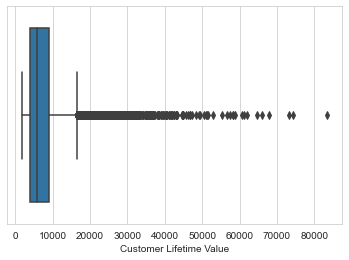

In [7]:
sns.boxplot(x=data['Customer Lifetime Value'])

In [ ]:
sns.boxplot(x=data_df['Customer Lifetime Value'])

In [9]:
def to_dict(wrangling):
    for col in wrangling.columns:
        if wrangling[col].dtypes == 'int64':
            wrangling1 = wrangling.select_dtypes(include='int64')
            discrete = wrangling1.to_dict()
        else:
            wrangling2 = wrangling.select_dtypes(include='number')
            continuous =wrangling2.to_dict()
    return continuous, discrete

In [15]:
numericals = wrangling.select_dtypes(np.number)

In [11]:
continuous, discrete = to_dict(numericals)

In [13]:
continuous_df = pd.DataFrame.from_dict(continuous)
continuous_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [14]:
discrete_df = pd.DataFrame.from_dict(discrete)
discrete_df.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [16]:
cat = wrangling.select_dtypes('object')

In [ ]:
#3)Normalize the continuous variables. You can use any one method you want.

In [18]:
wrangling_corr = wrangling.corr()
display(wrangling_corr.head())
numericals = wrangling_corr.drop(['Customer Lifetime Value'], axis=1)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335


In [19]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)
x_standardized

array([[-0.14553769,  0.39916731, -0.32941762, -0.33822398, -0.4645609 ,
        -0.3101484 ,  0.09751233],
       [ 2.51047619, -0.73997253, -0.44433019, -0.36919377, -0.33633884,
        -0.40261942, -1.34725102],
       [-0.2572361 ,  2.06470019, -0.34892565, -0.30561543, -0.3949139 ,
        -0.41040347,  1.10480347],
       [-0.28459739, -0.68013402,  2.6416423 , -0.49580987, -0.33950046,
        -0.34887273, -0.4461329 ],
       [-0.21425203, -0.63811803, -0.49315446,  2.64209057, -0.35903327,
        -0.41674661, -0.456634  ],
       [-0.1944239 , -0.73019879, -0.34794025, -0.37004597,  2.64368481,
        -0.37194486, -0.50028785],
       [-0.23543461, -0.7249886 , -0.33657295, -0.40667453, -0.35106507,
         2.64431609, -0.47076238],
       [-1.17899447,  1.04954447, -0.34130119, -0.35652701, -0.39827236,
        -0.38358059,  2.01875234]])

In [21]:
#5)The time variable can be useful. Try to transform its data into a useful one. 
#Hint: Day week and month as integers might be useful.

In [22]:
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [24]:
cat['Effective To Date'] = datetime.datetime
cat['Effective To Date'].strftime("%d %W %m").head()

AttributeError: 'Series' object has no attribute 'strftime'

In [25]:
cat['day'] = pd.DatetimeIndex(cat['Effective To Date']).day
cat['week'] = pd.DatetimeIndex(cat['Effective To Date']).week
cat['month'] = pd.DatetimeIndex(cat['Effective To Date']).month
cat.head()

TypeError: <class 'type'> is not convertible to datetime

In [26]:
cat['day'] = cat['Effective To Date'].dt.day
cat['week'] = cat['Effective To Date'].dt.week
cat['month'] = cat['Effective To Date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [27]:
cat['month'] = cat['Effective To Date'].dt.to_period('M')
cat['day'] = cat['Effective To Date'].dt.to_period('D')
cat['week'] = cat['Effective To Date'].dt.to_period('W')

AttributeError: Can only use .dt accessor with datetimelike values

In [1]:
#6)Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, 
#change it using encoding.

In [5]:
numericals = wrangling.select_dtypes(np.number)